<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/Assignemnt_23(23_06_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h3>CSE-221710301019-PRASAD REDDY<h3>**

<H3>Take any dataset of your own and explore all the data preprocessing steps whichever is required to perform on the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Internship-AIML-Python-Colab/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44
4,male,group C,some college,standard,none,76.0,78.0,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95
996,male,group C,high school,free/reduced,none,62.0,55.0,55
997,female,group C,high school,free/reduced,completed,59.0,71.0,65
998,female,group D,some college,standard,completed,68.0,78.0,77


1. Check the data types and get the summary stats


In [3]:
df.info()
# It consists of 8 columns 
# Has  null values
# Has 5 object and 3 numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      986 non-null    object 
 5   math score                   995 non-null    float64
 6   reading score                985 non-null    float64
 7   writing score                1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


2. If you have any missing values in the numerical columns try imputing those columns     
Create a dataframe by imputing  the missing values with mean 
Create a dataframe by imputing the missing values with median


In [4]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course        14
math score                      5
reading score                  15
writing score                   0
dtype: int64

In [5]:
df.isna().sum().sum()

34

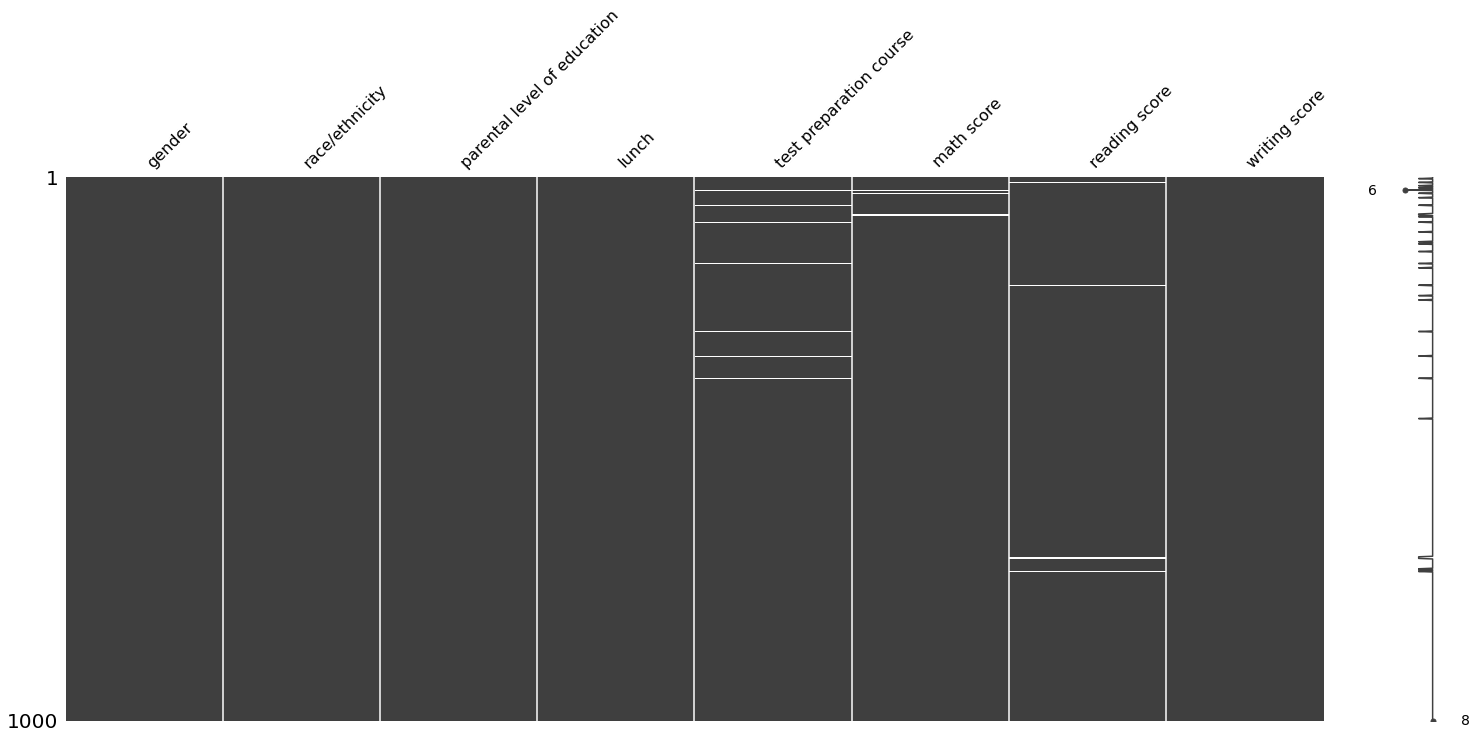

In [6]:
import missingno as msn
msn.matrix(df)
#There are  missing values

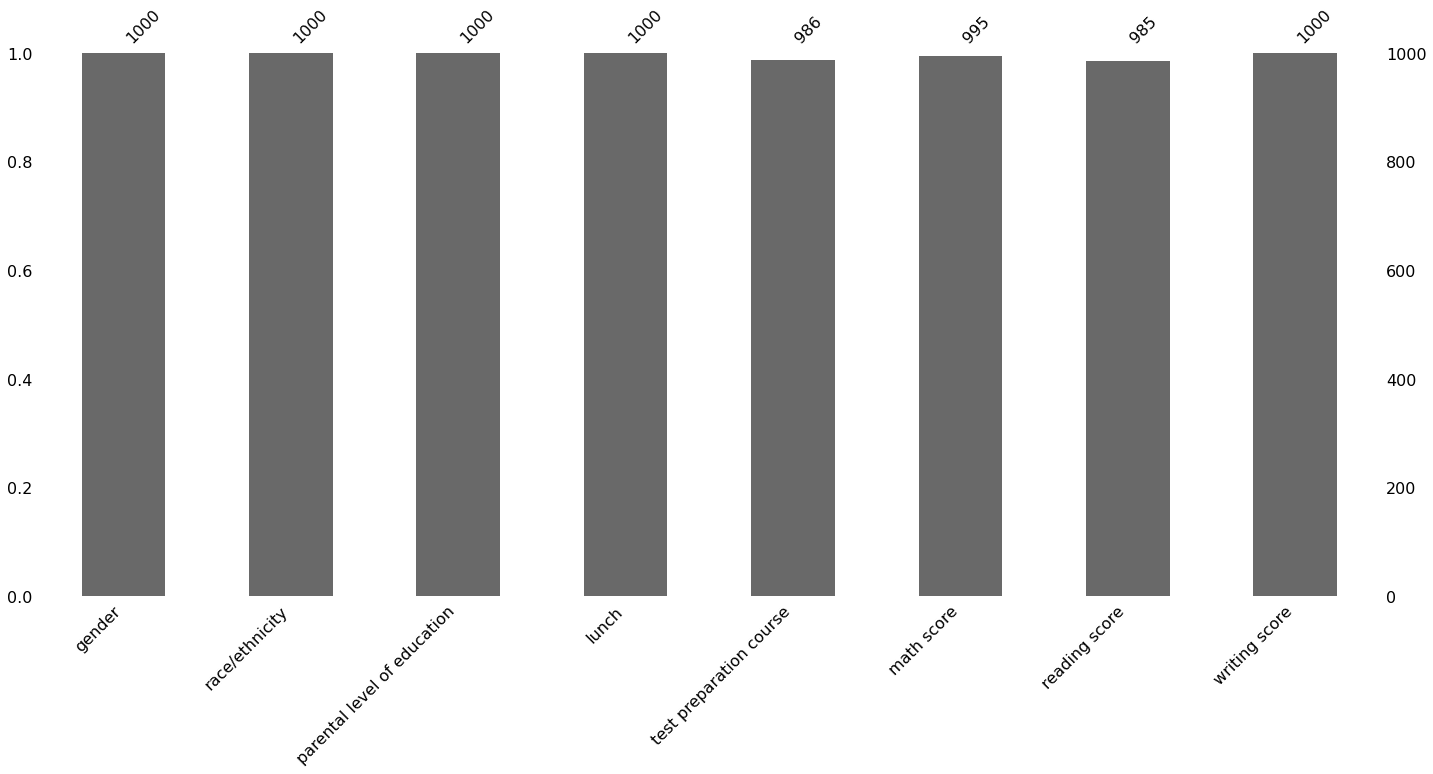

In [7]:
msn.bar(df)

In [8]:
#Imputing nan values with mean in numeric columns
df_mean = df.fillna(df.mean())
df_mean

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.000000,74
1,female,group C,some college,standard,completed,69.0,90.000000,88
2,female,group B,master's degree,standard,none,90.0,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.0,69.124873,44
4,male,group C,some college,standard,none,76.0,78.000000,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.000000,95
996,male,group C,high school,free/reduced,none,62.0,55.000000,55
997,female,group C,high school,free/reduced,completed,59.0,71.000000,65
998,female,group D,some college,standard,completed,68.0,78.000000,77


In [9]:
temp = df_mean.copy()

In [10]:
df_mean.isna().sum().sum()

14

In [11]:
#Imputing nan values with median in numeric columns
df_median = df.fillna(df.median())
df_median

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74
1,female,group C,some college,standard,completed,69.0,90.0,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,70.0,44
4,male,group C,some college,standard,none,76.0,78.0,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95
996,male,group C,high school,free/reduced,none,62.0,55.0,55
997,female,group C,high school,free/reduced,completed,59.0,71.0,65
998,female,group D,some college,standard,completed,68.0,78.0,77


In [12]:
df_median.isna().sum().sum()

14

3. If any missing values in categorical columns, impute it with mode

In [13]:
temp = temp.fillna(temp["test preparation course"].mode().iloc[0])
df1=temp.copy()
temp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.000000,74
1,female,group C,some college,standard,completed,69.0,90.000000,88
2,female,group B,master's degree,standard,none,90.0,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.0,69.124873,44
4,male,group C,some college,standard,none,76.0,78.000000,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.000000,95
996,male,group C,high school,free/reduced,none,62.0,55.000000,55
997,female,group C,high school,free/reduced,completed,59.0,71.000000,65
998,female,group D,some college,standard,completed,68.0,78.000000,77


In [14]:
temp["test preparation course"].isna().sum()

0

4. For the categorical columns apply  different kinds of encoding techniques


In [15]:
temp["gender"].value_counts()
#Here only 2 categories are present in gender so we can use LabelEncoder

female    518
male      482
Name: gender, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

In [17]:
temp.gender = le.fit_transform(temp["gender"])
temp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72.0,72.000000,74
1,0,group C,some college,standard,completed,69.0,90.000000,88
2,0,group B,master's degree,standard,none,90.0,95.000000,93
3,1,group A,associate's degree,free/reduced,none,47.0,69.124873,44
4,1,group C,some college,standard,none,76.0,78.000000,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88.0,99.000000,95
996,1,group C,high school,free/reduced,none,62.0,55.000000,55
997,0,group C,high school,free/reduced,completed,59.0,71.000000,65
998,0,group D,some college,standard,completed,68.0,78.000000,77


In [18]:
print(df["race/ethnicity"].nunique())
print(df["parental level of education"].nunique())
print(df["lunch"].nunique())
print(df["test preparation course"].nunique())

5
6
2
2


In [19]:
# Total no of columns after endocing :
1+5+6+2+2+3

19

In [20]:
#Now applying One hot encoder for other categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
coltrans = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1,2,3,4])],remainder='passthrough')

In [22]:
temp = coltrans.fit_transform(temp)
temp

array([[ 0.,  1.,  0., ..., 72., 72., 74.],
       [ 0.,  0.,  1., ..., 69., 90., 88.],
       [ 0.,  1.,  0., ..., 90., 95., 93.],
       ...,
       [ 0.,  0.,  1., ..., 59., 71., 65.],
       [ 0.,  0.,  0., ..., 68., 78., 77.],
       [ 0.,  0.,  0., ..., 77., 86., 86.]])

In [23]:
temp = pd.DataFrame(temp)
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,72.0,72.000000,74.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,69.0,90.000000,88.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,90.0,95.000000,93.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,47.0,69.124873,44.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,76.0,78.000000,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,88.0,99.000000,95.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62.0,55.000000,55.0
997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,59.0,71.000000,65.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,68.0,78.000000,77.0


5. Visualize the columns with different kinds of plots and write the patterns you have observed.

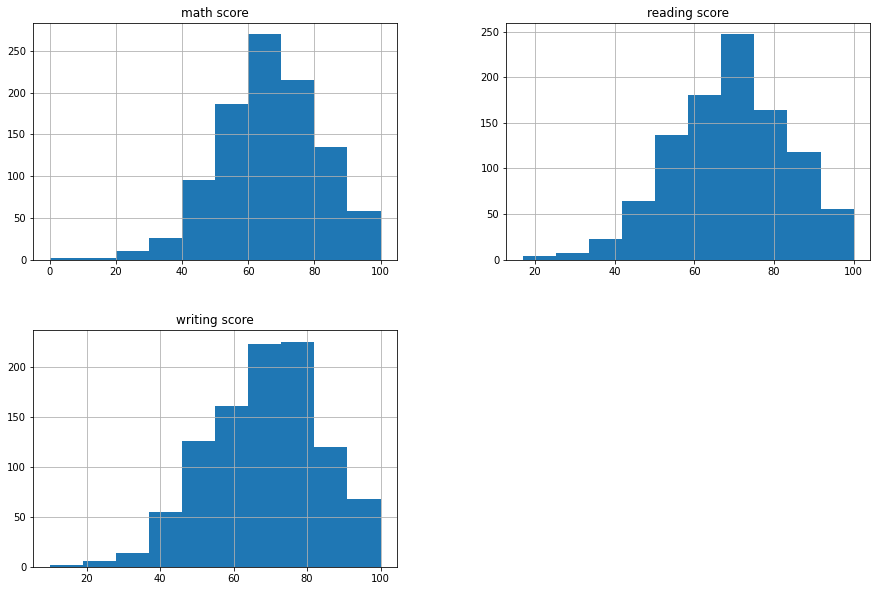

In [24]:
df1.hist(figsize=(15,10))
plt.show()

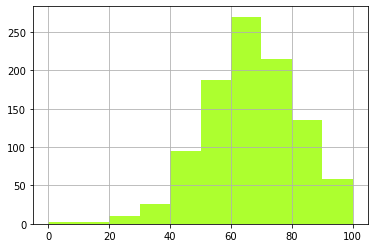

In [25]:
plt.hist("math score",data=df1,color="greenyellow")
#Between (60 - 70) marks  270 members hae scored
plt.grid()

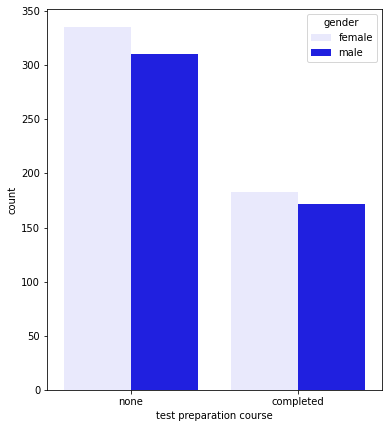

In [26]:
plt.figure(figsize=(6,7))
sns.countplot("test preparation course",data=df1,hue="gender",color="blue")
plt.show()
# We can observe that most of the females have not completed the test

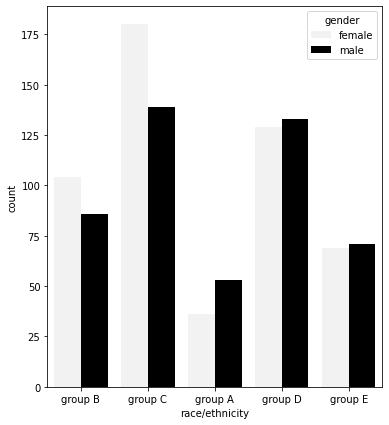

In [27]:
plt.figure(figsize=(6,7))
sns.countplot("race/ethnicity",data=df1,hue="gender",color="black")
plt.show()
#more females are in group c

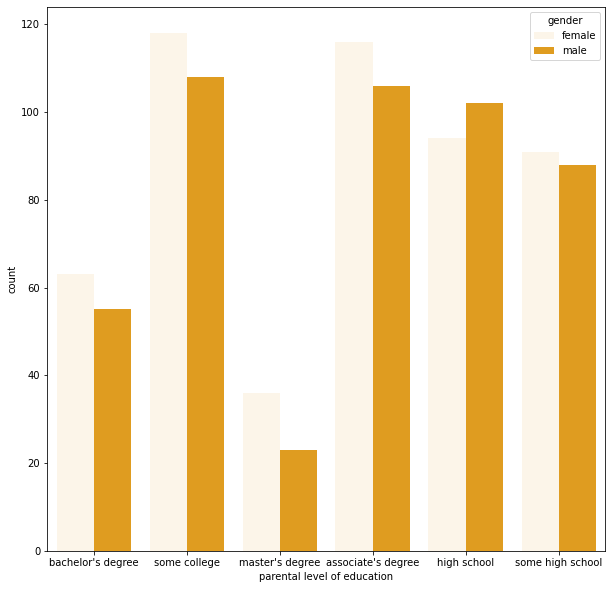

In [28]:
plt.figure(figsize=(10,10))
sns.countplot("parental level of education",data=df1,hue="gender",color="orange")
plt.show()

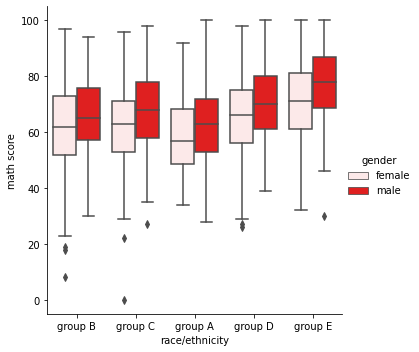

In [29]:
sns.catplot("race/ethnicity","math score",data=df1,kind="box",hue="gender",color="red")
plt.show()

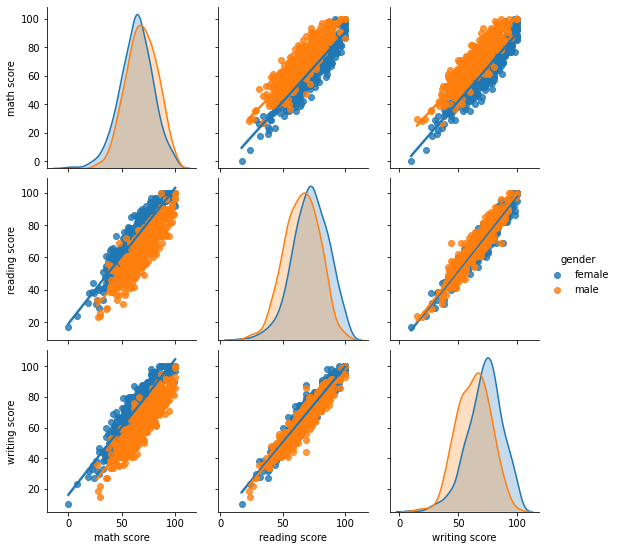

In [30]:
sns.pairplot(data=df1,kind="reg",hue="gender")

6. Using boxplot, visualize the outliers if present in the dataset


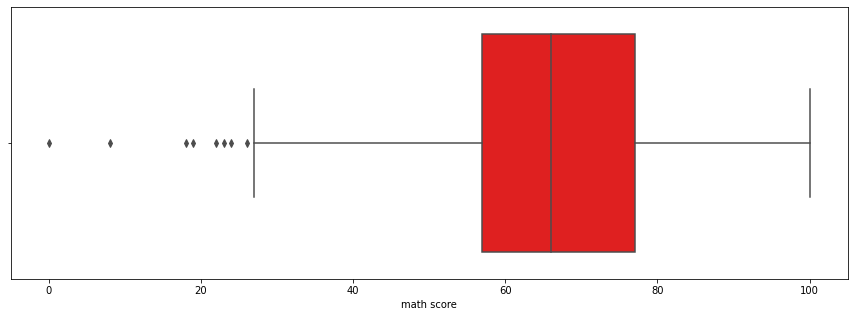

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot("math score",data=df1,color="red")

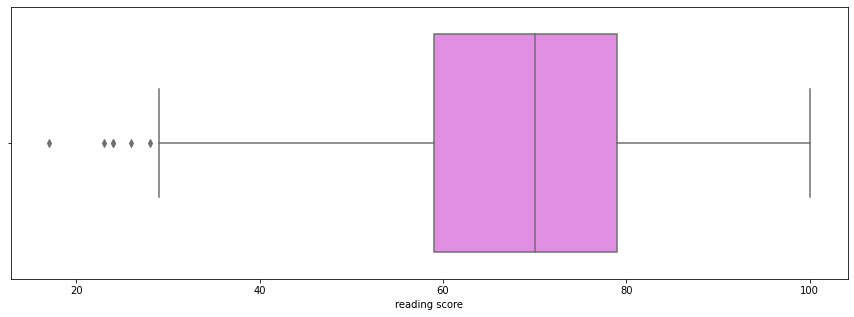

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot("reading score",data=df1,color="violet")

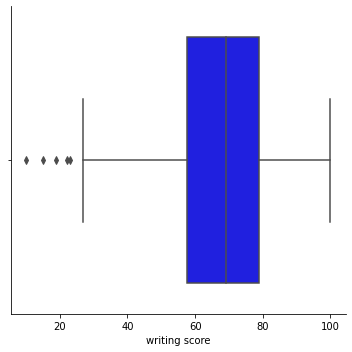

In [33]:
sns.catplot("writing score",data=df1,color="blue",kind="box")

**Outliers are present in all numeric columns**

- Creating a new column named total score

In [34]:
df1["total_score"] = df1["math score"] + df1["reading score"] + df1["writing score"]

7.Identify the Output column in the dataset and divide the entire dataset into Input and Output; create the training and testing datasets

Identifying Input column

In [35]:
df1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score'],
      dtype='object')

In [36]:
X = df1.iloc[:,:8] 
y = df1["total_score"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


8. If your data requires scaling to be done, apply the feature scaling


- <h3>No feature scaling is required since the numeric columns are having same magnitude i.e marks